# Suitability Analysis using Earthpy

This notebook will perform a suitability analysis DSM rasters using earthpy. First, I will upload a single tile and merged rasters. Then I will perform a Hillshade analysis and view the histogram. Finally, I will reclass and Multiply the rasters. 

In [1]:
import numpy as np
import os
import rasterio
import matplotlib.pyplot as plt

## Part 1: Uploading and Viewing the DSM

In [2]:
dsm= rasterio.open("D:/git/GIS5572shpfiles/projdata/q2758/2758-03-03_2652.img") ##Single Raster
        
dsm_full = rasterio.open('D:/git/GIS5572shpfiles/projdata/q2758/2758-01-09_2786.img') ##Merged raster from Arcpy

In [3]:
dsm

<open DatasetReader name='D:/git/GIS5572shpfiles/projdata/q2758/2758-03-03_2652.img' mode='r'>

In [4]:
from rasterio.plot import show

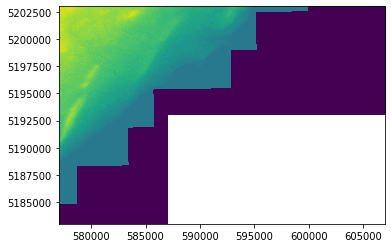

In [5]:
show(dsm_full)

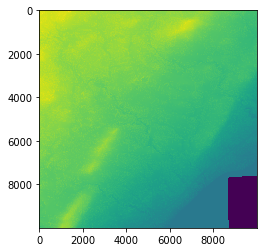

In [6]:
show(dsm.read())

## Part 2: Hillshade and Histogram

In [14]:
elevation = dsm.read(1) ##single tile

full_elevation = dsm_full.read(1) ##merge tile 


In [16]:
import earthpy.spatial as es
import earthpy.plot as ep

In [18]:
WinAM_52 = es.hillshade(elevation, azimuth=131.87, altitude = 5) ##Single tile 

#Hillshade at winter moring solstice 

In [20]:
WinPM_52 = es.hillshade(elevation, azimuth=228.11, altitude = 5) ##Single tile 

##Hillshade at winter evening solstice 

In [21]:
SumAM_52 = es.hillshade(elevation, azimuth=60.66, altitude = 5) ##Single tile 

##Hillshade at summer morning solstice

In [22]:
SumPM_52 = es.hillshade(elevation, azimuth =299.33, altitude = 5) ##Single tile 

##Hillshade at summer evening solstice 

In [23]:
WinAM_86 = es.hillshade(full_elevation, azimuth=131.87, altitude = 5) ##Merged tile

#Hillshade at winter moring solstice 

In [24]:
WinPM_86 = es.hillshade(full_elevation, azimuth=228.11, altitude = 5) ##Merged tile

##Hillshade at winter evening solstice 

In [25]:
SumAM_86 = es.hillshade(full_elevation, azimuth=60.66, altitude = 5) ##Merged tile

##Hillshade at summer morning solstice

In [26]:
SumPM_86 = es.hillshade(full_elevation, azimuth =299.33, altitude = 5) ##Merged tile

##Hillshade at summer evening solstice 

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22a181a49c8>)

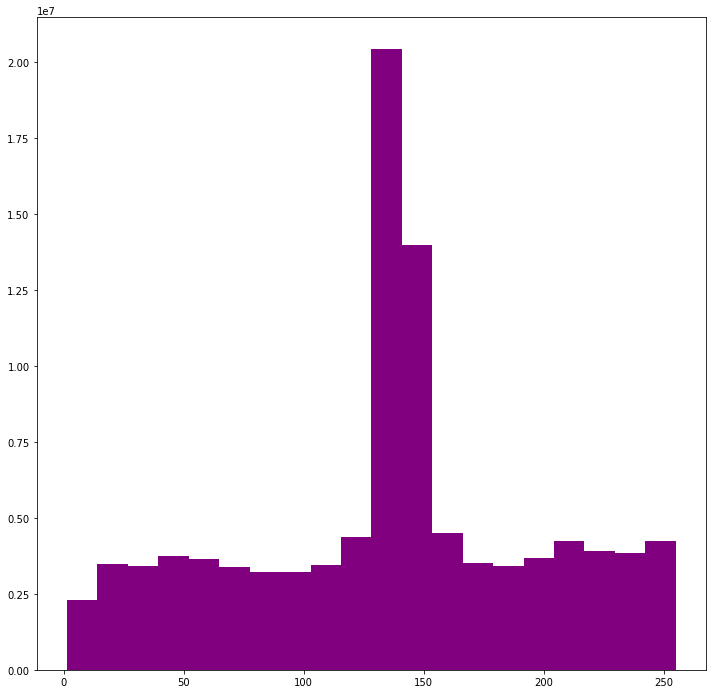

In [28]:
ep.hist(WinAM_52) ##histogram of winter morning solstice

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22a1b16a888>)

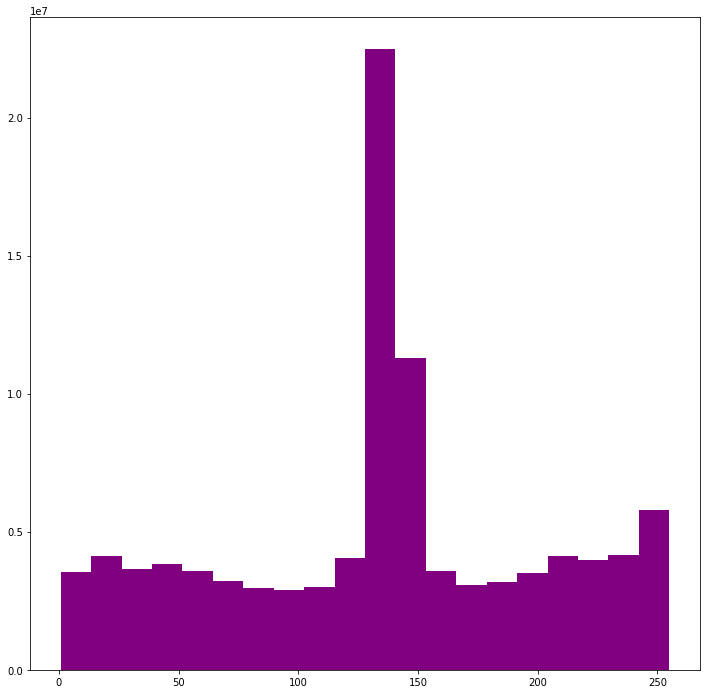

In [29]:
ep.hist(WinPM_52) ##histogram of winter evening solstice

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22a1b6b6c88>)

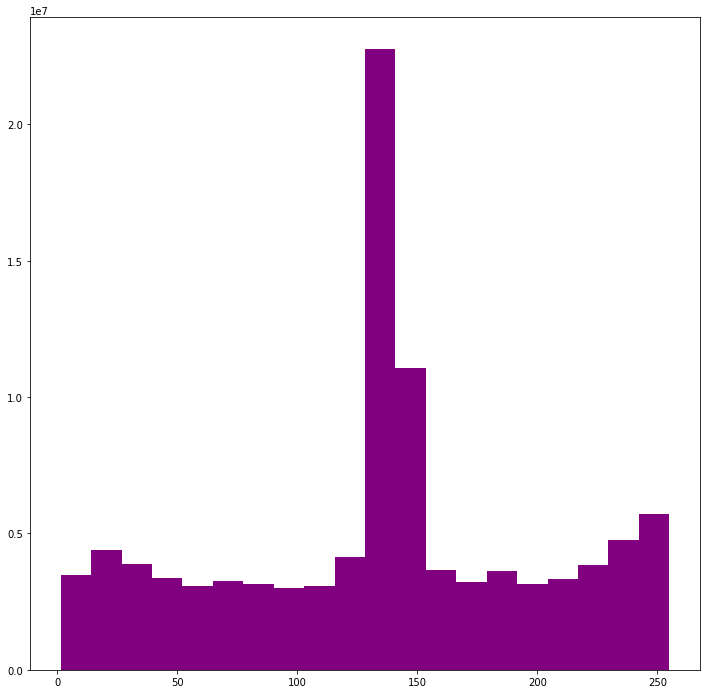

In [30]:
ep.hist(SumAM_52) ##Histogram of summer morning soltice 

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22a1b740388>)

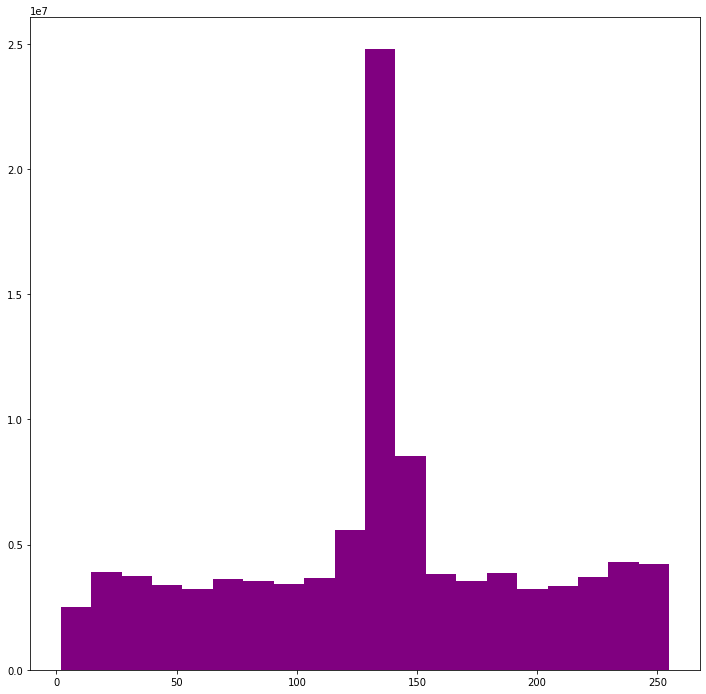

In [31]:
ep.hist(SumPM_52) ##histogram of summer evening solstice

## Part 3: Reclass and Multiply Rasters

In [32]:
WinAM_52[WinAM_52 <= 127.5] = 0
WinAM_52[WinAM_52 > 127.5] =1 

##Reclass single tile winter morning soltice


(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22a1bee3ec8>)

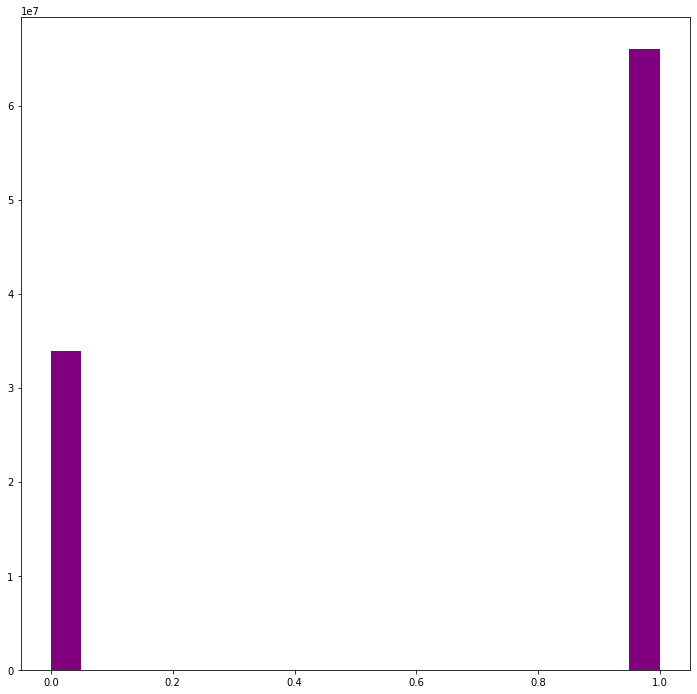

In [33]:
ep.hist(WinAM_52) ##New Histogram

In [34]:
WinPM_52[WinPM_52 <= 127.5] = 0
WinPM_52[WinPM_52 > 127.5] =1

##Reclass single tile winter evening Solstice 

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22a1bc769c8>)

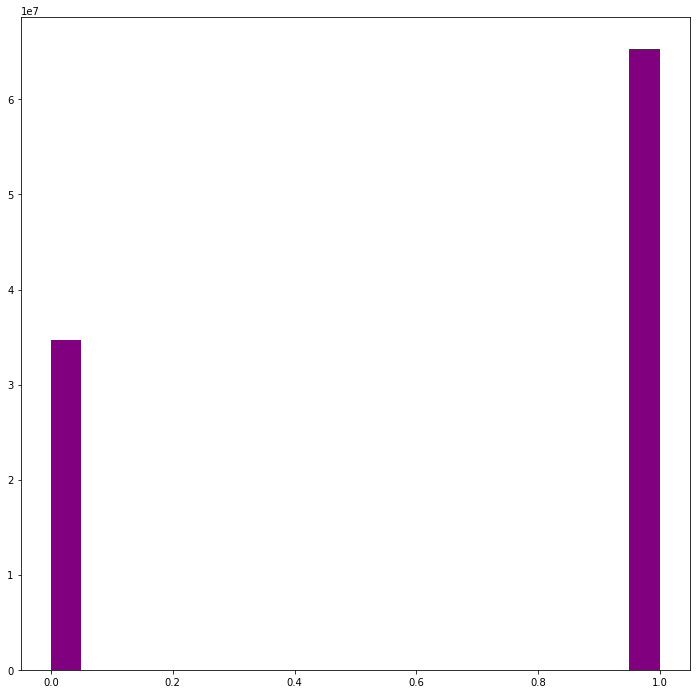

In [35]:
ep.hist(WinPM_52) ## new histogram

In [36]:
SumAM_52[SumAM_52 <= 127.5] = 0
SumAM_52[SumAM_52 > 127.5] =1 

##Reclass single tile summer morning Solstice 

In [37]:
SumPM_52[SumPM_52 <= 127.5] = 0
SumPM_52[SumPM_52 > 127.5] =1

##Reclass single tile summer evening Solstice 


In [39]:
Final_52 = WinAM_52 * WinPM_52 * SumAM_52 *SumPM_52     ##Multiplying rasters

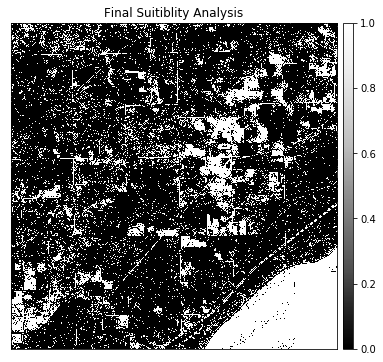

In [40]:
ep.plot_bands(
    Final_52,
    cbar=True,
    title="Final Suitiblity Analysis",
    figsize=(10, 6),
)

plt.show() ##Final result

In [41]:
WinAM_86[WinAM_86 <=127.5] = 0
WinAM_86[WinAM_86 > 127.5] = 1                

SumAM_86[SumAM_86 <= 127.5] = 0
SumAM_86[SumAM_86 > 127.5] = 1

WinPM_86[WinPM_86 <= 127.5] = 0
WinPM_86[WinPM_86 > 127.5] = 1

SumPM_86[SumPM_86 <= 127.5] = 0
SumPM_86[SumPM_86 > 127.5] = 1


##Repeating reclass with merged raster

In [42]:
Final_86 = WinAM_86 * WinPM_86 * SumAM_86 * SumPM_86 ##multiplying merged raster

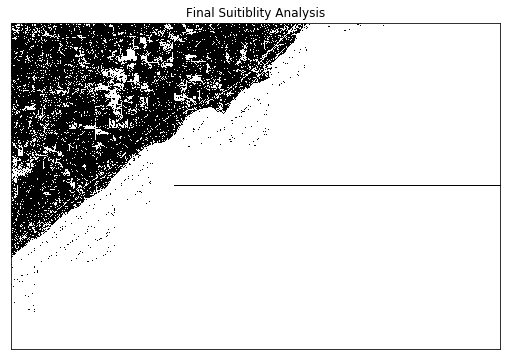

In [43]:
ep.plot_bands(
    Final_86,
    cbar=False,
    title="Final Suitiblity Analysis",
    figsize=(10, 6),
)

plt.show() ##Final Raster

In [64]:
import pickle 

In [65]:
filename = 'final_52_array.p'
with open(filename, 'wb') as filehandler:
    pickle.dump(Final_52, filehandler)
    
    
##Saving the single tile array so that I can open it in arcpy. 

The final array will be downloaded to arc pro. This concludes the notebook.